# Data Summary and Visualization of the MAC PACK '19

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

This reads in the csv file that was created from the python script dedicated to web scraping meet results and creating a full data frame containing information on all the meets that the men's cross country team competed in this year. It drops an unused variable left over from that process.

In [12]:
MeetInfo = pd.read_csv("Meet.csv")
MeetInfo = MeetInfo.drop(['Unnamed: 0'], axis=1)
MeetInfo.head()

,Place,TeamPlace,LastName,FirstName,Year,Team,AvgMile,Time,Score,Meet,1k,2.4k,4.5k,7k,5k,3k,5.8k
0,8.0,1,Lepak,Jake,SR-4,Macalester,5:20.6,21:22.1,8.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.0,2,Johnson,Adrian,JR-3,Macalester,5:25.4,21:41.4,13.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,3,Hayes,August,FR-1,Macalester,5:30.4,22:01.4,16.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17.0,4,Reyes Herrera,Edwin,SR-4,Macalester,5:31.5,22:05.9,17.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.0,5,Mayse,Smith,SO-2,Macalester,5:31.7,22:06.7,19.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN


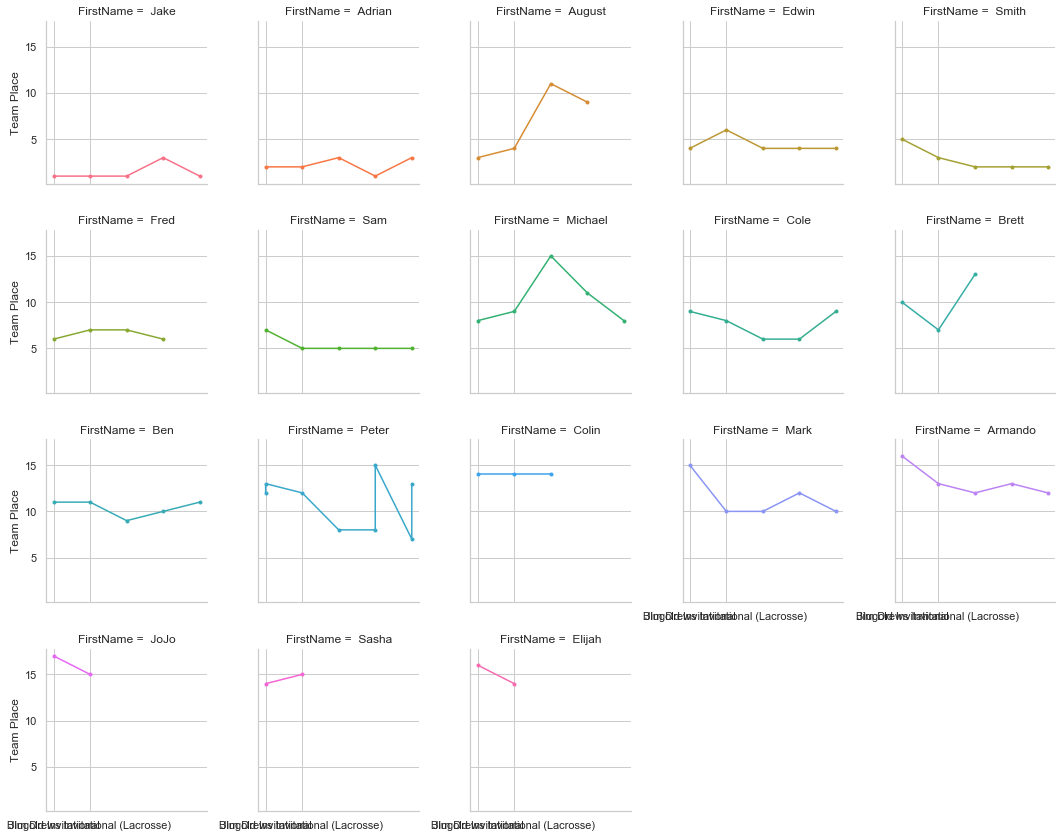

In [11]:
sns.set(style="whitegrid")
g = sns.FacetGrid(MeetInfo, col="FirstName", hue = "FirstName", col_wrap=5)
(g.map(plt.plot,"Meet", "TeamPlace", marker=".")
.set_axis_labels("", "Team Place"))